In [ ]:
import pandas as pd  #preprocessing
import numpy as np   #for numerical data
import seaborn as sns  #visualization
import plotly.express as  px #visualization
import matplotlib.pyplot as plt #for plotting
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv("water_potability.csv")
df.head() # the first 5 columns
#df.tail() # the last 5 columns


ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [100]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

**Preprocessing Starts**

In [ ]:
df.describe() # the descriptive statistics of DataFrames

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [ ]:
df.info() # the information about the data whether they are float, int,etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


There are some null values in the dataset let see the total number of null values in each column

In [103]:
df.isnull().sum() # the sum of all null values in each column

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Plotting the dataset with the null values only 

<Axes: >

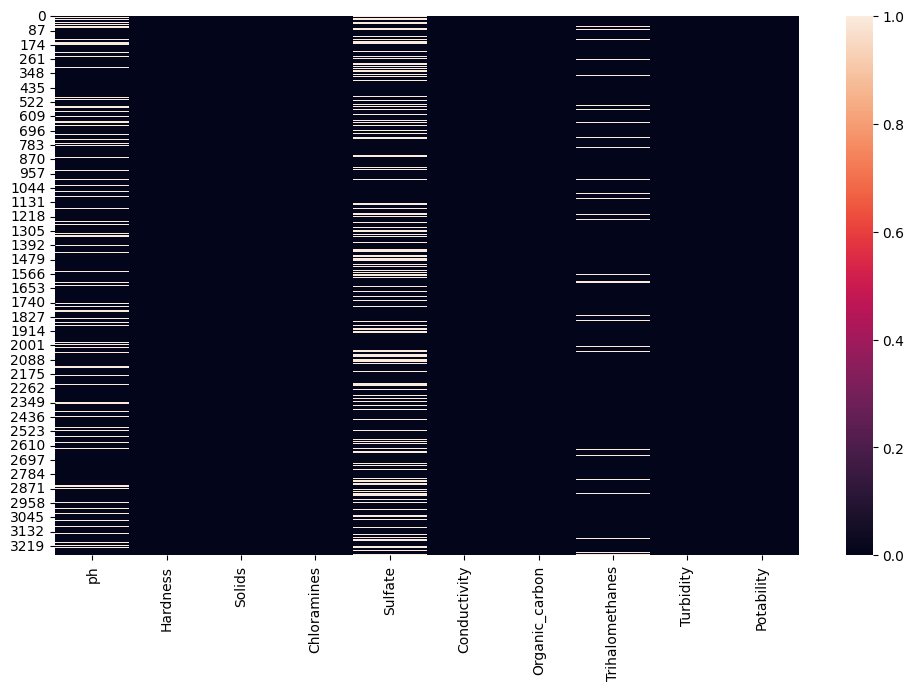

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(df.isnull())

<Axes: >

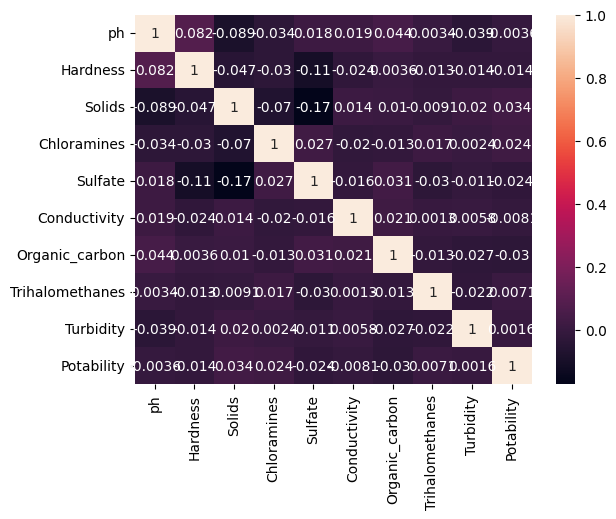

In [105]:
plt.Figure(figsize = (12,8))
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='Potability', ylabel='count'>

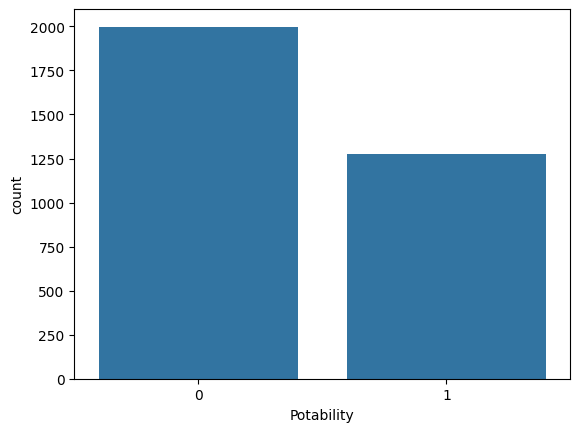

In [106]:
sns.countplot(x="Potability", data=df)

In [107]:
df["Potability"].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

Visualization of the data set and checking for outliers

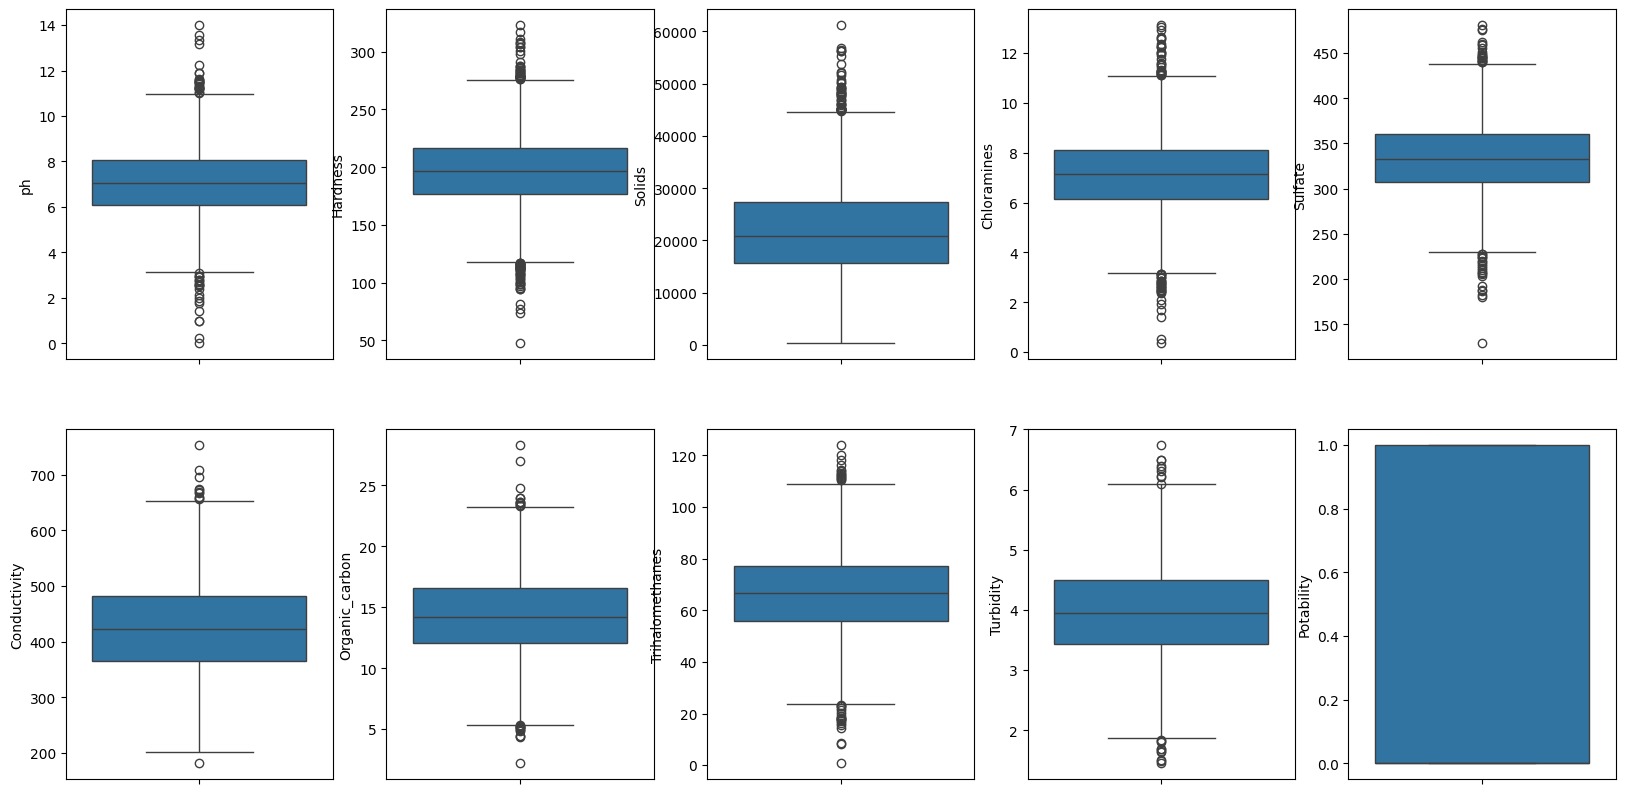

In [108]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
ax = ax.flatten()
index = 0
for col, values in df.items():
    sns.boxplot(y = col, data = df, ax=ax[index])
    index += 1

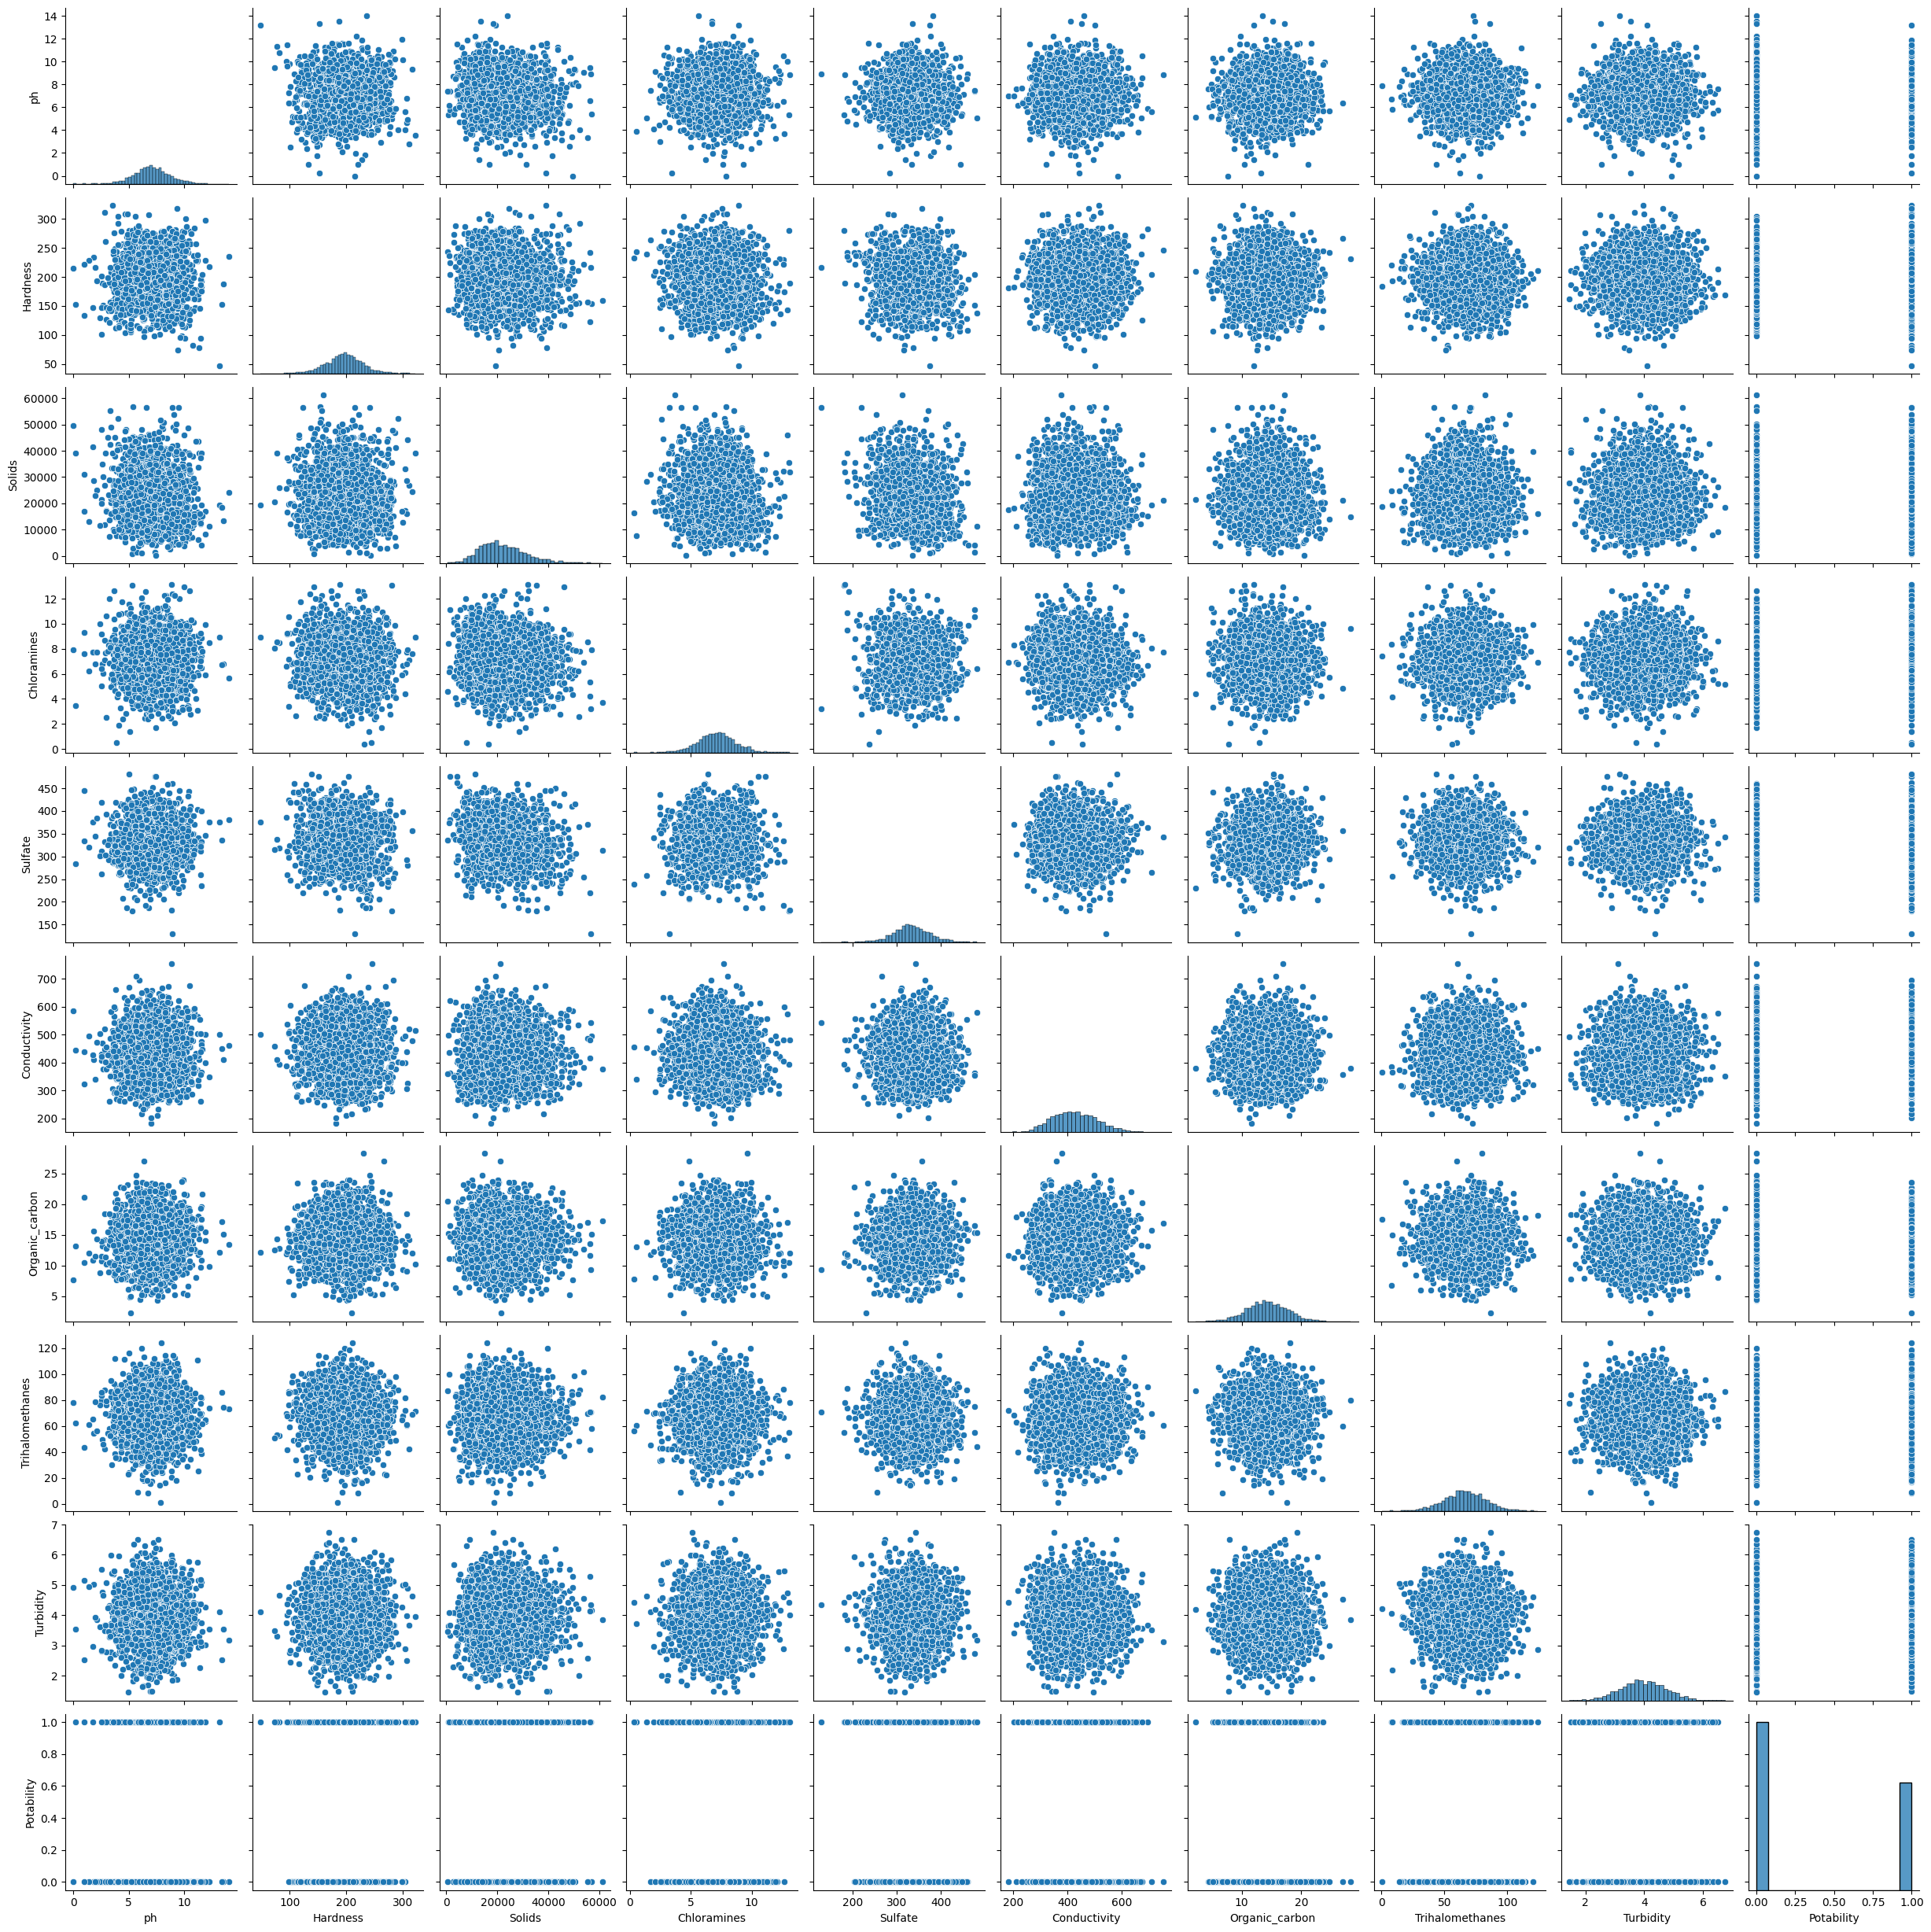

In [67]:
sns.pairplot(df)

In [109]:
fig = px.pie(df, names = "Potability", hole = 0.4, template= "plotly_dark")
fig.show()

In [110]:
fig = px.scatter(df,x="ph",y="Sulfate",color="Potability",template="plotly_dark")
fig.show()

In [111]:
fig = px.scatter(df,x="Organic_carbon",y="Hardness",color="Potability",template="plotly_dark")
fig.show()

In [35]:
fig = px.scatter(df,x="Trihalomethanes",y="Chloramines",color="Potability",template="plotly_dark")
fig.show()

Dealing with Null Values

Text(0, 0.5, 'Percentage of Missing Values')

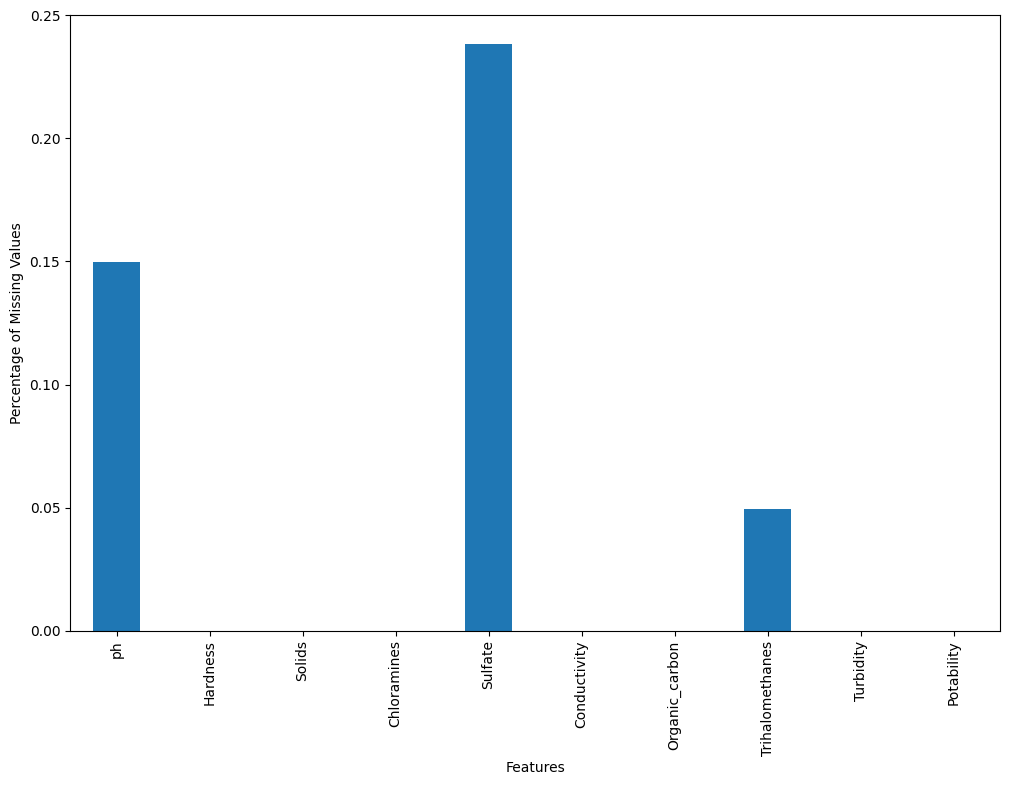

In [112]:
df.isnull().mean().plot.bar(figsize=(12,8))
plt.xlabel("Features")
plt.ylabel("Percentage of Missing Values")

In [113]:
df["ph"]  = df["ph"].fillna(df["ph"].mean())

df["Sulfate"]  = df["Sulfate"].fillna(df["Sulfate"].mean())

df["Trihalomethanes"]  = df["Trihalomethanes"].fillna(df["Trihalomethanes"].mean())

Check for null values if they exist or not

In [114]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

The next step will show the null values in visualized form 

<Axes: >

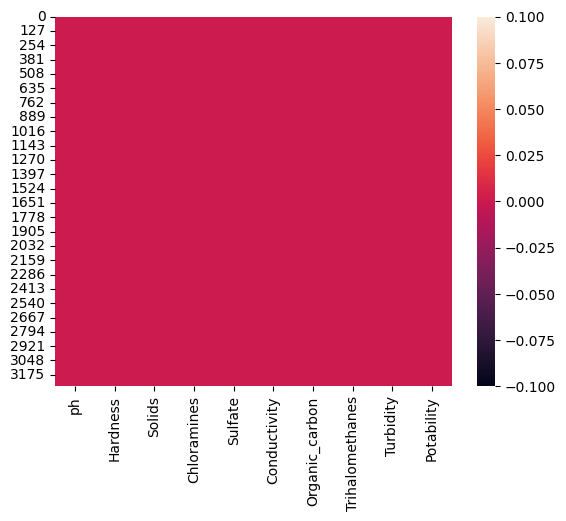

In [115]:
sns.heatmap(df.isnull())

**Data Preparation**

In [116]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [117]:
x = df.drop("Potability", axis=1)
y = df["Potability"]

In [118]:
x.shape, y.shape

((3276, 9), (3276,))

In [119]:
scaler = StandardScaler()
x= scaler.fit_transform(x)
x

array([[-6.04313345e-16,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]],
      shape=(3276, 9))

Splitting Data (keeping 80% data for training and 20% data for testing)

In [120]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [121]:
x_train.shape, x_test.shape

((2620, 9), (656, 9))

In [122]:
y_train.shape, y_test.shape

((2620,), (656,))

**KNN**

In [127]:
from sklearn.neighbors import  KNeighborsClassifier

#Creating object of Model
# model_knn = KNeighborsClassifier()

In [128]:
for i in range(4,17):
    model_knn = KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(x_train, y_train)
    prediction_knn = model_knn.predict(x_test)
    accuracy_score_knn = accuracy_score(y_test, prediction_knn)
    print(i, accuracy_score_knn)

4 0.6189024390243902
5 0.5945121951219512
6 0.6219512195121951
7 0.600609756097561
8 0.6326219512195121
9 0.6310975609756098
10 0.6310975609756098
11 0.6204268292682927
12 0.6295731707317073
13 0.6204268292682927
14 0.6402439024390244
15 0.6234756097560976
16 0.6432926829268293


In [129]:

from sklearn.neighbors import KNeighborsClassifier
model_knn.fit(x_train, y_train)
prediction_knn = model_knn.predict(x_test)
accuracy_score_knn = accuracy_score(y_test, prediction_knn)
accuracy_score_knn*100

64.32926829268293

The Accuracy Score of KNN is **67.225** 

**SVM**

In [130]:
from sklearn.svm import SVC

#Creating object of Model
model_svm = SVC(kernel= "rbf")

Model Training

In [131]:
model_svm.fit(x_train, y_train)

SVC()

Make Prediction

In [132]:
prediction_svm = model_svm.predict(x_test)

In [133]:
accuracy_score_svm = accuracy_score(y_test, prediction_svm)
accuracy_score_svm*100

68.90243902439023

The Accuracy Score of the SVM Model is **70.121**

**XGBoost**

In [134]:
from xgboost import XGBClassifier

#Creating object of Model
model_xgb = XGBClassifier(n_estimators=100, learning_rate=0.04)

Training model

In [88]:
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.04, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Prediction

In [89]:
prediction_xgb = model_xgb.predict(x_test)

In [90]:
accuracy_score_xgb = accuracy_score(y_test, prediction_xgb)
accuracy_score_xgb*100

67.6829268292683

The Accuracy of the XGBoost is **67.682**

**RF**

In [91]:
from sklearn.ensemble import RandomForestClassifier

#Creating object of Model
model_rf = RandomForestClassifier()

Training model

In [92]:
model_rf.fit(x_train, y_train)

RandomForestClassifier()

Predictions

In [93]:
prediction_rf = model_rf.predict(x_test)

In [94]:
accuracy_score_rf = accuracy_score(y_test, prediction_rf)
accuracy_score_rf*100

70.57926829268293

The Accuracy of the RF is **70.579**

In [95]:
cm3= confusion_matrix(y_test, prediction_rf)
cm3

array([[375,  33],
       [160,  88]])

Visualization of the accuracy score

In [96]:
models = pd.DataFrame({
    "Model": ["KNN", "SVM", "XGBoost", "Random Forest"],
    "Accuracy": [accuracy_score_knn, accuracy_score_svm, accuracy_score_xgb, accuracy_score_rf]
})
models

Model  Accuracy
0            KNN  0.672256
1            SVM  0.701220
2        XGBoost  0.676829
3  Random Forest  0.705793

Model  Accuracy
3  Random Forest  0.705793
1            SVM  0.701220
2        XGBoost  0.676829
0            KNN  0.672256

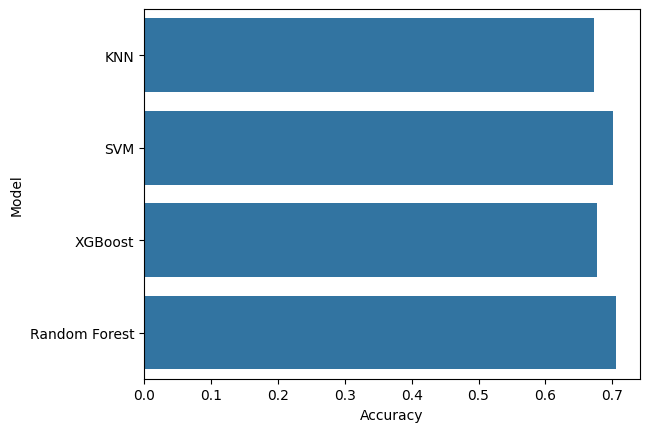

In [97]:
sns.barplot(x= "Accuracy", y="Model", data =models)
models.sort_values(by="Accuracy", ascending= False)